Saving sensor_log_with_images.csv to sensor_log_with_images (1).csv
Saving ai_outputs_with_images.csv to ai_outputs_with_images (1).csv


,Image_ID,Defect_Type,Confidence,Severity,Batch_ID,Stage,Machine_ID,Decision,Image_File,Image_Base64
0,crazing_001.jpg,Crazing,0.90,Critical,B001,FVI,M01,Resample,crazing_001.jpg,NaN
1,crazing_002.jpg,Crazing,0.94,Critical,B001,FVI,M03,Reject,crazing_002.jpg,NaN
2,crazing_003.jpg,Crazing,0.96,Critical,B001,FVI,M01,Reject,crazing_003.jpg,NaN
3,inclusion_001.jpg,Inclusion,0.94,Major,B001,FVI,M04,Resample,inclusion_001.jpg,NaN
4,inclusion_002.jpg,Inclusion,0.90,Major,B001,FVI,M04,Resample,inclusion_002.jpg,NaN


,Batch_ID,Timestamp,Stage,Machine_ID,Shift,Temp,Operator,Total_Defects,Image_File,Image_Base64
0,B001,2025-05-20 08:00,FVI,M01,Day,27.0,Mai,5,crazing_001.jpg,NaN
1,B002,2025-05-20 09:00,FVI,M04,Night,25.6,Mai,5,inclusion_003.jpg,NaN
2,B003,2025-05-20 10:00,FVI,M01,Day,27.5,Mai,5,pitted_surface_002.jpg,NaN
3,B004,2025-05-20 11:00,FVI,M02,Night,25.7,Ali,3,scratches_001.jpg,NaN


Image,Type,Severity,Confidence,Decision
,Crazing,Critical,0.9,Resample
,Crazing,Critical,0.94,Reject
,Crazing,Critical,0.96,Reject
,Inclusion,Major,0.94,Resample
,Inclusion,Major,0.9,Resample
,Inclusion,Major,0.9,Resample


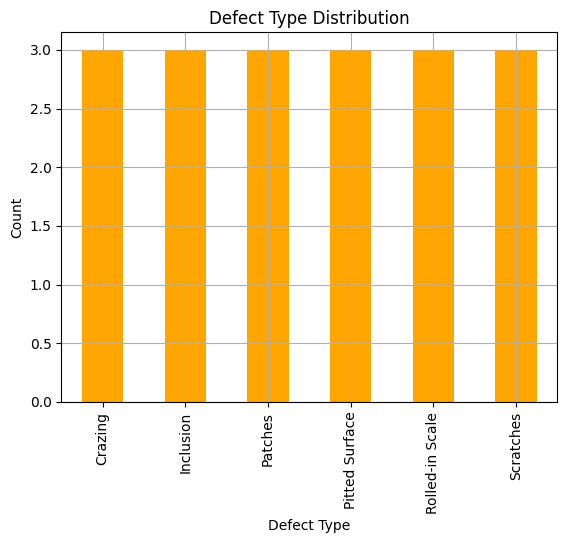

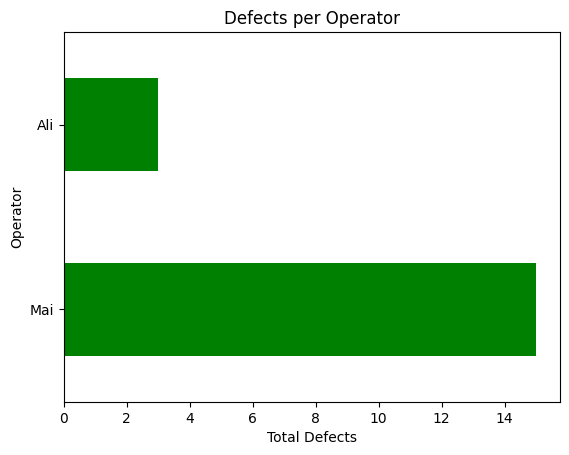

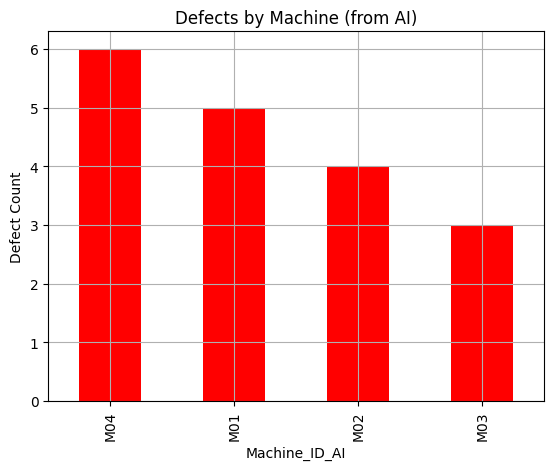

Baseline Cost (100% Inspection): $4.50
Smart Sampling Cost: $4.50
💡 Saved: $0.00


In [ ]:
# 🧠 PHASE 4 – SMART SAMPLING DEMO NOTEBOOK

# 📥 Step 1: Upload CSV files
from google.colab import files
uploaded = files.upload()

# 📊 Step 2: Load Data
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

ai_df = pd.read_csv('ai_outputs_with_images.csv')
sensor_df = pd.read_csv('sensor_log_with_images.csv')

display(ai_df.head())
display(sensor_df.head())

# 🖼 Step 3: Show images from base64
def show_images(df, limit=6):
    html = ''
    for _, row in df.head(limit).iterrows():
        img = f'<img src="data:image/jpg;base64,{row.Image_Base64}" width="100">'
        html += f"<tr><td>{img}</td><td>{row.Defect_Type}</td><td>{row.Severity}</td><td>{row.Confidence}</td><td>{row.Decision}</td></tr>"
    display(HTML(f'<table border="1"><tr><th>Image</th><th>Type</th><th>Severity</th><th>Confidence</th><th>Decision</th></tr>{html}</table>'))

show_images(ai_df)

# 📈 Step 4: Visualize defect distribution
ai_df['Defect_Type'].value_counts().plot(kind='bar', title='Defect Type Distribution', color='orange')
plt.ylabel('Count')
plt.xlabel('Defect Type')
plt.grid(True)
plt.show()

# 📊 Step 5: Merge with sensor log and analyze
merged = ai_df.merge(sensor_df, on='Batch_ID')

# 🔧 Rename columns to avoid _x/_y confusion
merged.rename(columns={'Machine_ID_x': 'Machine_ID_AI', 'Machine_ID_y': 'Machine_ID_Sensor'}, inplace=True)

# Phân tích theo Operator (từ sensor_log)
merged['Operator'].value_counts().plot(kind='barh', title='Defects per Operator', color='green')
plt.xlabel('Total Defects')
plt.show()

# Phân tích theo Machine (dùng từ AI output)
merged['Machine_ID_AI'].value_counts().plot(kind='bar', title='Defects by Machine (from AI)', color='red')
plt.ylabel('Defect Count')
plt.grid(True)
plt.show()

# 💰 Step 6: Estimate cost savings
cost_per_check = 0.25  # USD per inspection
total_images = len(ai_df)
baseline_cost = 18 * cost_per_check
smart_cost = total_images * cost_per_check

print(f"Baseline Cost (100% Inspection): ${baseline_cost:.2f}")
print(f"Smart Sampling Cost: ${smart_cost:.2f}")
print(f"💡 Saved: ${baseline_cost - smart_cost:.2f}")
